<a href="https://colab.research.google.com/github/Animichael/Car-price-Analysis-And-Prediction/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAR PRICE PREDICTION USING LINEAR REGRESSION ALGORITHM




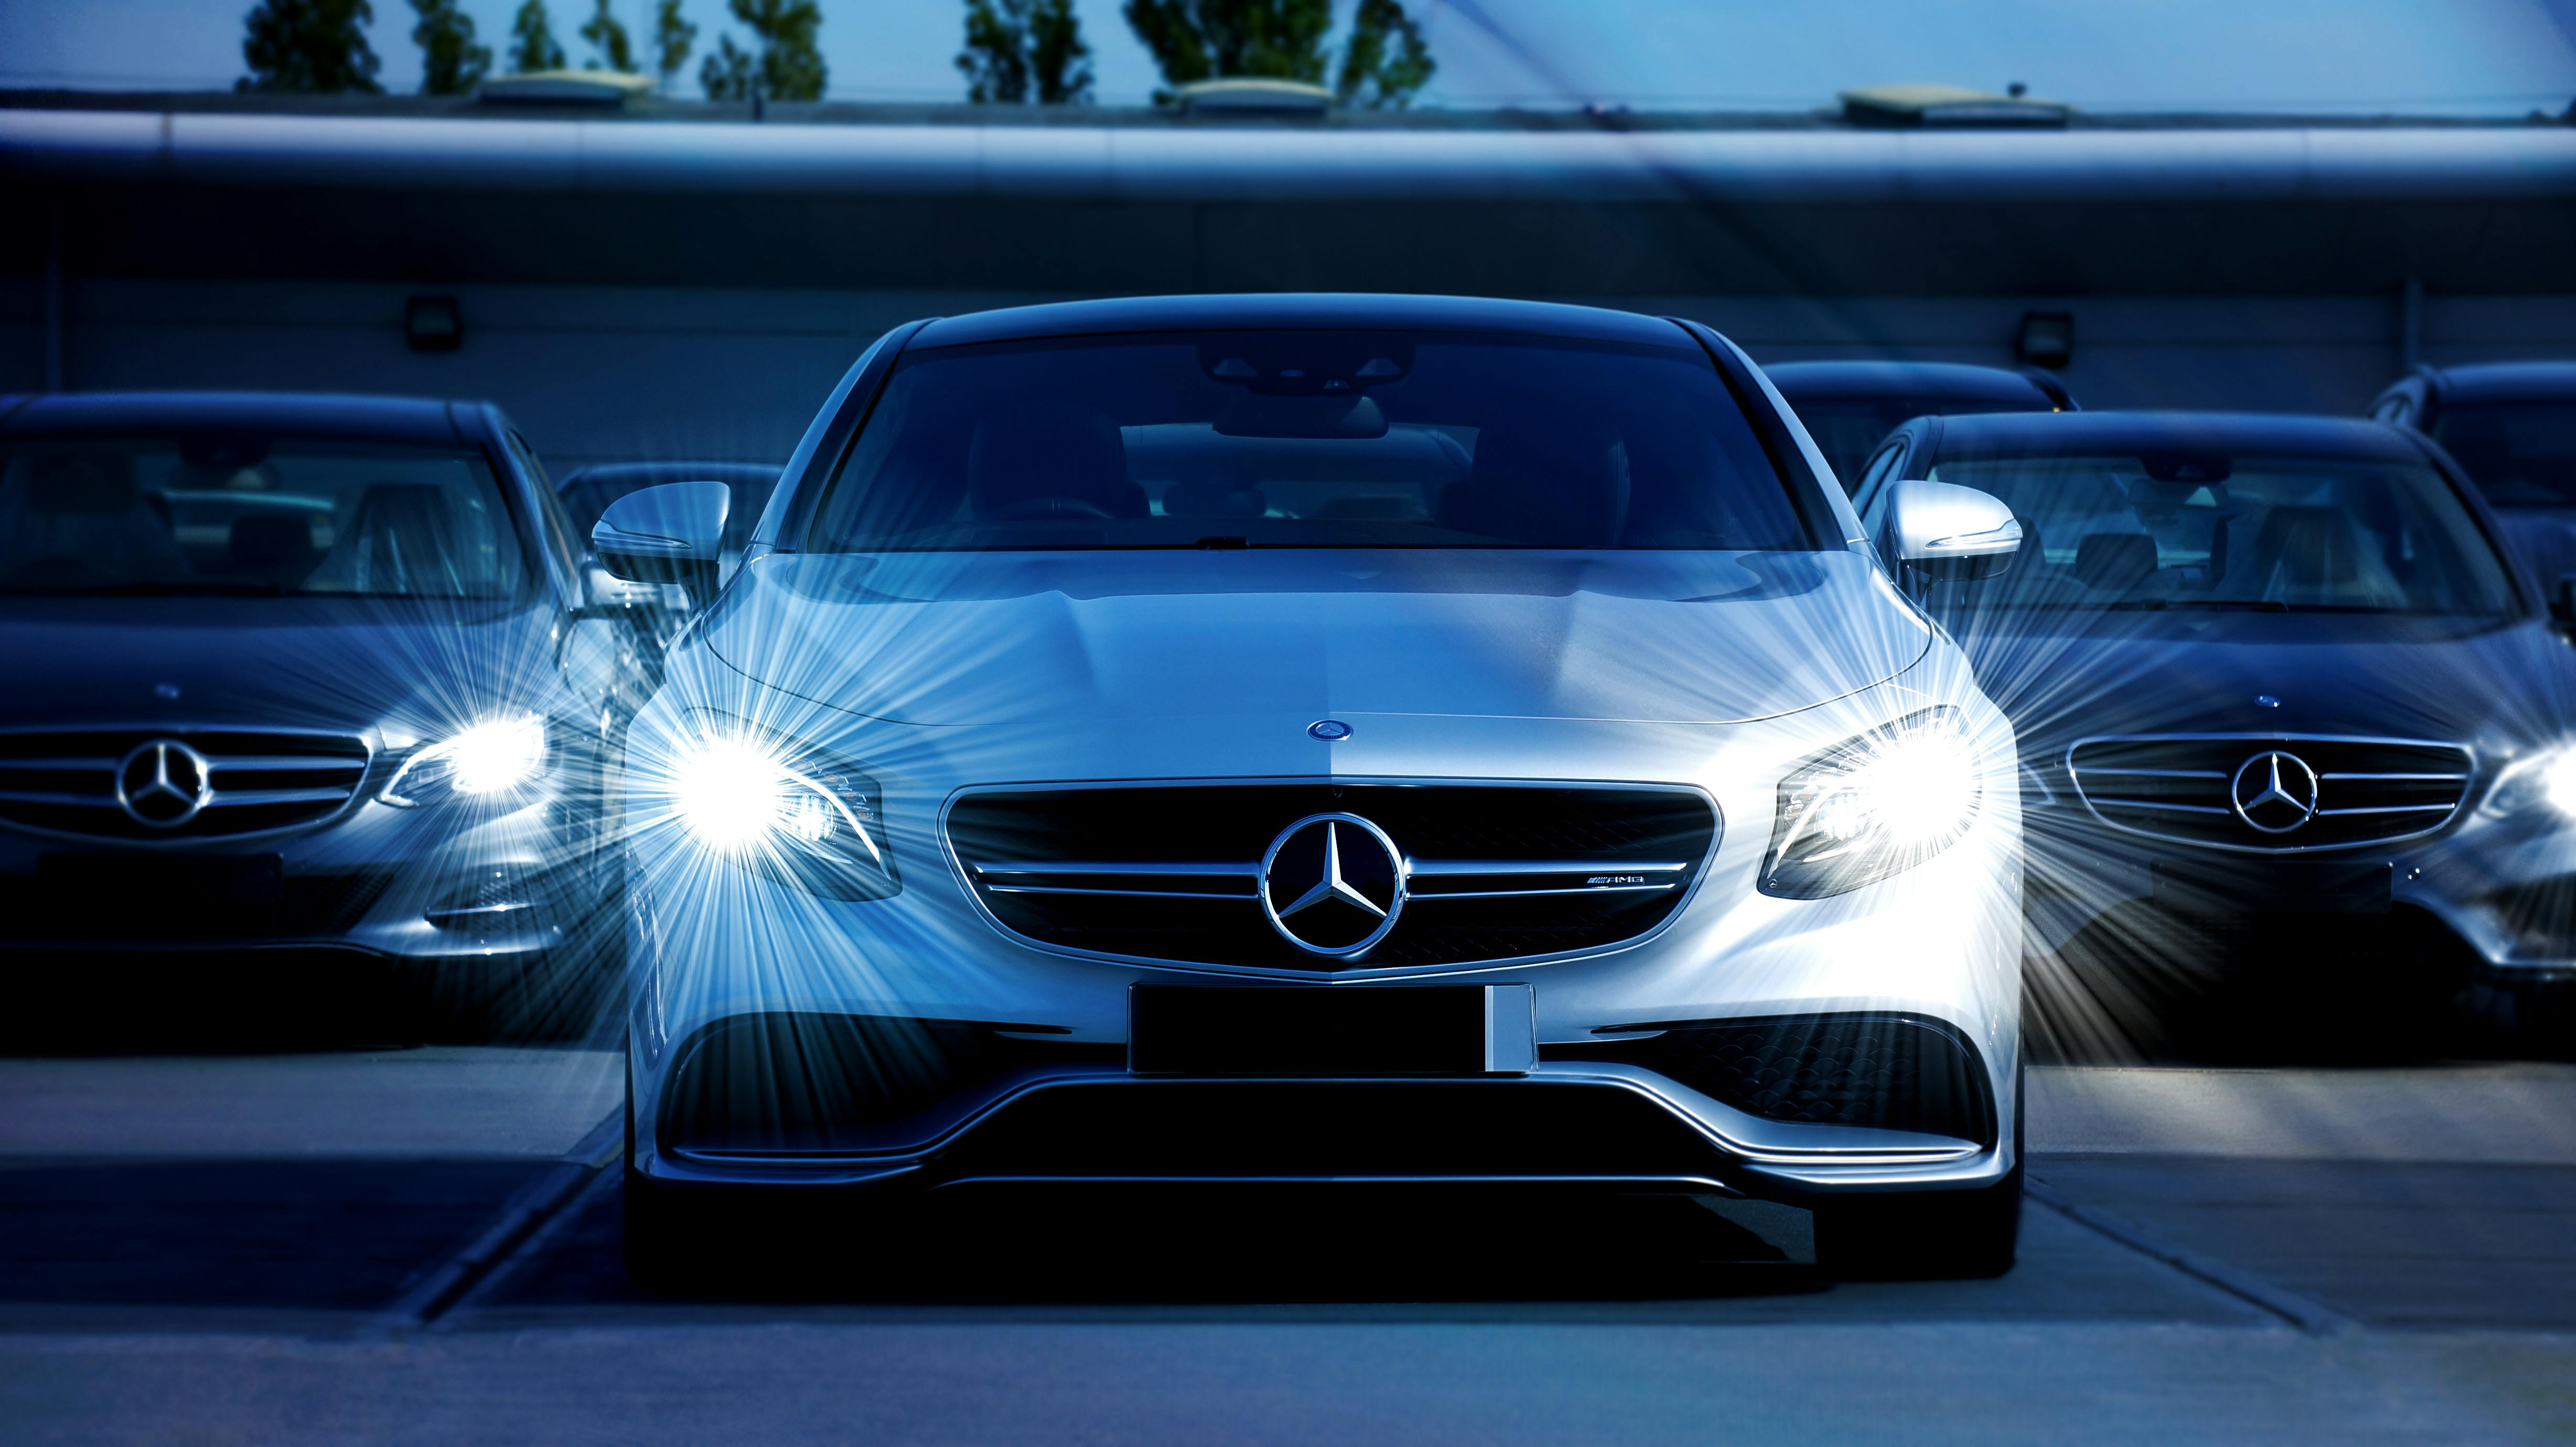

**LOADING THE LIBRARIES FOR THIS PROJECT**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio


**LOADING THE DATASET FOR THIS PROJECT**

In [ ]:
#Loading the dataset for the project
df_train=pd.read_csv('/content/train.csv')

In [ ]:
# view the train dataframe
df_train

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


**CHECKING FOR MISSING VALUES**

In [ ]:
df_train.isnull().sum()

,0
ID,0
Price,0
Levy,0
Manufacturer,0
Model,0
Prod. year,0
Category,0
Leather interior,0
Fuel type,0
Engine volume,0


**DATA CLEANING**

In [ ]:
# Importing the regular expression library
import re

In [ ]:
# Defining the function for replacing the - character with 3000
def clean(text):
    # Replace '-' with '3000' if it exists in the text
    return 3000 if str(text) == '-' else text

In [ ]:
# Applying the pattern to the levy variable for the filtering
df_train['Levy'] = df_train['Levy'].apply(clean)


In [ ]:
df_train

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,3000,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,3000,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


**DATA VISUALIZATION AND ANALYSIS**

In [ ]:
df_train['Manufacturer'].value_counts()

,count
Manufacturer,
HYUNDAI,3769
TOYOTA,3662
MERCEDES-BENZ,2076
FORD,1111
CHEVROLET,1069
...,...
TESLA,1
PONTIAC,1
SATURN,1


In [ ]:
# Get the count of each manufacturer
manufacturer_counts = df_train['Manufacturer'].value_counts().reset_index()
manufacturer_counts.columns = ['Manufacturer', 'Count']  # Rename columns for clarity

# Filter to include only manufacturers with a count of 1000 and above
manufacturer_counts_filtered = manufacturer_counts[manufacturer_counts['Count'] >= 100]

# Create the bar chart for filtered manufacturers
fig = px.bar(manufacturer_counts_filtered, x='Manufacturer', y='Count',
             title='Distribution of Car Manufacturers with Counts of 100 and Above')

# Show the plot
fig.show()


In [ ]:
df_train['Manufacturer'].value_counts()

,count
Manufacturer,
HYUNDAI,3769
TOYOTA,3662
MERCEDES-BENZ,2076
FORD,1111
CHEVROLET,1069
...,...
TESLA,1
PONTIAC,1
SATURN,1


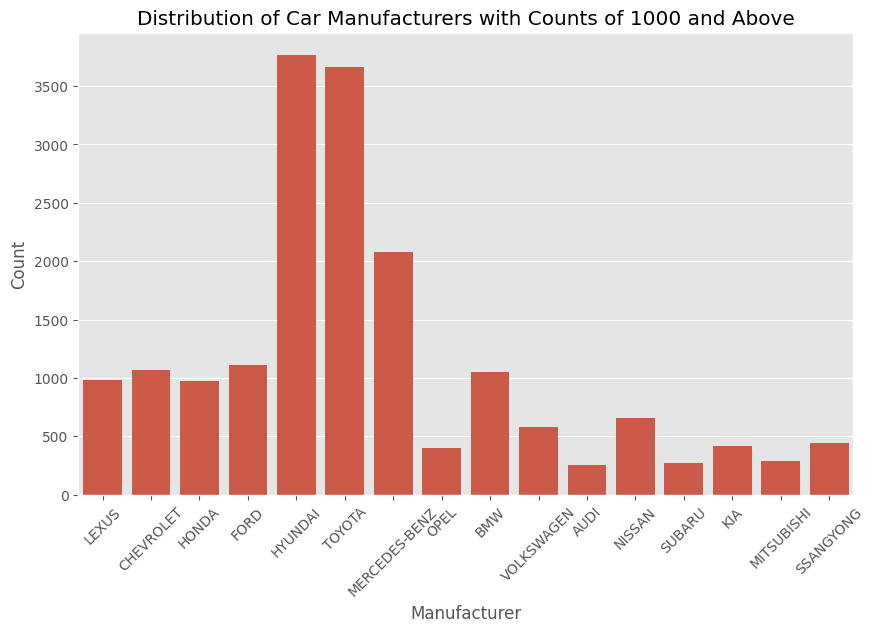

In [ ]:
# Count the occurrences of each manufacturer
manufacturer_counts = df_train['Manufacturer'].value_counts()

# Filter to include only manufacturers with a count of 1000 and above
filtered_manufacturers = manufacturer_counts[manufacturer_counts >= 200].index
df_filtered = df_train[df_train['Manufacturer'].isin(filtered_manufacturers)]

# Set the figure size
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))

# Create the countplot for the filtered data
sns.countplot(data=df_filtered, x='Manufacturer')

# Add title and labels
plt.title('Distribution of Car Manufacturers with Counts of 1000 and Above')
plt.xlabel('Manufacturer')
plt.ylabel('Count')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)
plt.show()

**STORY TELLING** ✅

---



---



The car manufacturer data highlights Hyundai as the most frequent brand, with 3,769 vehicles, likely due to its reputation for affordability and reliability. Toyota follows closely with 3,662 entries, reflecting its strong appeal across demographics for durable, dependable cars. Mercedes-Benz ranks third with 2,076 vehicles, indicating significant demand for luxury options. Ford, with 1,111 entries, is popular for its practical utility vehicles, while Chevrolet has 1,069 entries, showing its versatility across different vehicle types. This distribution illustrates a balanced market interest in value-driven, reliable brands, as well as a notable segment drawn to premium offerings

**VISUALIZING AND INTERPRETING THE MODEL VARIABLE**

In [ ]:
df_train['Model'].value_counts().head(30)

,count
Model,
Prius,1083
Sonata,1079
Camry,938
Elantra,922
E 350,542
Santa FE,533
FIT,446
H1,437
Tucson,429


In [ ]:

#Counting the occurrences of each model
model_counts = df_train['Model'].value_counts().reset_index()
model_counts.columns = ['Model', 'Count']  # Rename columns for clarity

# Filtering to include only models with a count of 100 and above
model_counts_filtered = model_counts[model_counts['Count'] >= 100]

# Create the bar chart for filtered models
fig = px.bar(model_counts_filtered, x='Model', y='Count',
             title='Distribution of Car Models with Counts of 100 and Above',
             labels={'Model': 'Models', 'Count': 'Number of Cars'})

# Show the plot
fig.update_xaxes(tickangle=45)  # Rotate x-axis labels for readability
fig.show()

**STORY TELLING** ✅


---



---


The top 30 car models in the dataset reveal clear consumer preferences, with Prius (1,083) and Sonata (1,079) taking the lead, showcasing a strong interest in fuel-efficient and practical vehicles. Following closely are Camry (938) and Elantra (922), indicating a demand for reliable, mid-sized sedans. Luxury and premium options such as the E 350 (542) and ML 350 (202) by Mercedes-Benz and the RX 450 (173) by Lexus show a distinct market segment that values premium features and comfort. Models like Santa FE (533) and Tucson (429) highlight the popularity of Hyundai’s SUVs, appealing to family and adventure-seeking drivers. Smaller models like the FIT (446) and Jetta (201) reflect a trend toward compact and economical options, suitable for urban settings. This distribution underscores a diverse market interest, ranging from fuel economy and reliability to premium quality and family-friendly vehicles.


**VISUALIZING CARS PRODUCTION YEAR**

In [ ]:
df_train['Prod. year'].value_counts()

,count
Prod. year,
2012,2155
2014,2124
2013,1963
2011,1612
2015,1549
2010,1483
2016,1476
2017,959
2008,737


In [ ]:

# Couningt the occurrences of each production year
year_counts = df_train['Prod. year'].value_counts().reset_index()
year_counts.columns = ['Production Year', 'Count']

# Sorting by year for a time series-like effect
year_counts = year_counts.sort_values(by='Production Year')
# Creating the line chart
fig = px.line(year_counts, x='Production Year', y='Count',
              title='Trend of Car Production Over the Years',
              labels={'Production Year': 'year', 'Count': 'Number of Cars Produced'})
fig.show()


In [ ]:
year_counts

,Production Year,Count
39,1939,3
46,1943,1
50,1947,1
37,1953,4
48,1957,1
45,1964,2
42,1965,2
49,1968,1
53,1973,1
44,1974,2


**VISUALIZING THE CATEGORY VARIABLE**

In [ ]:
df_train['Category'].value_counts()

,count
Category,
Sedan,8736
Jeep,5473
Hatchback,2847
Minivan,647
Coupe,532
Universal,364
Microbus,306
Goods wagon,233
Pickup,52


In [ ]:

from plotly.subplots import make_subplots

# Count the occurrences of each category
category_counts = df_train['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

# Creating a subplot with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Bar Plot of Categories'),
                    specs=[[{"type": "bar"}, {"type": "pie"}]])  # Specifying types of subplots

#Adding Bar Plot
bar_plot = go.Bar(x=category_counts['Category'], y=category_counts['Count'],
                  marker=dict(color='maroon'))  # Setting a solid blue color for the bar plot

fig.add_trace(bar_plot, row=1, col=1)

# Adding Pie Plot
pie_plot = go.Pie(labels=category_counts['Category'], values=category_counts['Count'],
                  hole=0.3,  # Creating a donut chart
                  marker=dict(colors=px.colors.sequential.Viridis))  # Using a sequential color palette

fig.add_trace(pie_plot, row=1, col=2)




# Updating layout
fig.update_layout(title_text='Category Variable Visualization', height=500)

# Showing the plot
fig.show()




In [ ]:
category_counts

,Category,Count
0,Sedan,8736
1,Jeep,5473
2,Hatchback,2847
3,Minivan,647
4,Coupe,532
5,Universal,364
6,Microbus,306
7,Goods wagon,233
8,Pickup,52
9,Cabriolet,36


**STORY TELLING ✅**

The visualization of car categories reveals a clear dominance of the Sedan category, with an impressive count of 8,736, making it the most popular choice among consumers. Following closely is the Jeep category, which attracts 5,473 buyers, highlighting a strong preference for SUVs and off-road vehicles. Hatchbacks, with 2,847 units sold, also show significant demand, catering to those seeking compact and versatile options. Other categories, such as Minivans (647), Coupes (532), and Universals (364), attract fewer buyers, reflecting niche preferences. The data shows that Microbuses (306) and Goods wagons (233) serve specialized needs, while categories like Pickup (52), Cabriolet (36), and Limousine (11) have much lower representation, indicating a more limited market appeal. This distribution underscores the diverse preferences in the automotive market, with Sedans clearly leading the pack

**VISUALIZATION THE LEATHER INTERIOR VARIABLE**

In [ ]:
df_train['Leather interior'].value_counts()

,count
Leather interior,
Yes,13954
No,5283


In [ ]:

# Counting the occurrences of each value in the leather interior variable
leather_counts = df_train['Leather interior'].value_counts().reset_index()
leather_counts.columns = ['Leather interior', 'Count']

# Creating the pie chart with customized colors and shadow effect
fig = px.pie(leather_counts, names='Leather interior', values='Count',
             title='Distribution of Leather Interior in Cars',
             color_discrete_sequence=['navy', 'maroon'])  # Using a nice colors for the pie chart
# Showing the plot
fig.show()

In [ ]:
leather_counts


,Leather interior,Count
0,Yes,13954
1,No,5283


**STORY TELLING**✅

The visualization of the leather interior variable reveals a significant preference among car buyers for vehicles equipped with leather interiors, as evidenced by 13,954 cars featuring this luxurious option compared to only 5,283 without it. This striking disparity suggests that leather interiors are highly sought after, likely due to their perceived quality, comfort, and aesthetic appeal. With nearly 72% of the surveyed vehicles boasting leather, it's clear that consumers are willing to invest in this premium feature, indicating a trend toward enhancing the overall driving experience. This data not only highlights consumer preferences but also presents valuable insights for manufacturers and marketers aiming to cater to the evolving demands of the automotive market

**VISUALIZING THE FUEL TYPE VARIABLE**

In [ ]:
df_train['Fuel type'].value_counts()

,count
Fuel type,
Petrol,10150
Diesel,4036
Hybrid,3578
LPG,892
CNG,494
Plug-in Hybrid,86
Hydrogen,1


In [ ]:

# Count the occurrences of each fuel type
fuel_counts = df_train['Fuel type'].value_counts().reset_index()
fuel_counts.columns = ['Fuel type', 'Count']

# Create the bar chart with customized colors for each bar
fig = px.bar(fuel_counts, x='Fuel type', y='Count',
             title='Distribution of Fuel Types in Cars',
             labels={'Fuel type': 'Fuel Type', 'Count': 'Number of Cars'},
             color='Fuel type',  # Use different colors for each bar based on the fuel type
             color_discrete_sequence=px.colors.qualitative.Prism)  # Choose a color palette for variety

fig.show()



**VISUALIZING THE GEAR BOX VARIABLE**

In [ ]:
df_train['Gear box type'].value_counts()

,count
Gear box type,
Automatic,13514
Tiptronic,3102
Manual,1875
Variator,746


In [ ]:

GB_counts = df_train['Gear box type'].value_counts().reset_index()
GB_counts.columns = ['Gear box type', 'Count']  # Rename columns for clarity

# Filtering to include only models with a count of 100 and above
GB_counts_filtered = GB_counts[GB_counts['Count'] >= 50]

# Create the bar chart for filtered models
fig = px.bar(GB_counts_filtered, x='Gear box type', y='Count',
             title='Distribution of Gear box type with Counts of 100 and Above',
             labels={'Model': 'Gear box type', 'Count': 'Number of cars'})

# Show the plot
fig.update_xaxes(tickangle=45)  # Rotate x-axis labels for readability
fig.show()

**STORY TELLING**✅

Automatic gearboxes are the most common, with 13,514 cars, showing strong preference. Tiptronic follows at 3,102, while Manual (1,875) and Variator (746) are less popular, indicating a trend toward convenience in transmission types among buyers

**VISUALIZING THE COLOR VARIABLE**

In [ ]:
df_train['Color'].value_counts()

,count
Color,
Black,5033
White,4489
Silver,3792
Grey,2375
Blue,1396
Red,639
Green,322
Orange,253
Brown,187


**VISUALIZING THE AIR BAR VARIABLE**

In [ ]:

airbag_counts = df_train['Airbags'].value_counts().reset_index()
airbag_counts.columns = ['Airbags', 'Count']  # Rename columns for clarity

# Create the bar chart
fig = px.bar(airbag_counts, x='Airbags', y='Count',
             title='Distribution of Airbag Types',
             labels={'Airbags': 'Type of Airbags', 'Count': 'Number of Cars'})

# Show the plot
fig.update_xaxes(tickangle=45)  # Rotate x-axis labels for readability
fig.show()

**DATA ENCODING**

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_train['Manufacturer'] = encoder.fit_transform(df_train['Manufacturer'])
df_train['Model'] = LabelEncoder().fit_transform(df_train['Model'])
df_train['Category'] = LabelEncoder().fit_transform(df_train['Category'])
df_train['Leather interior'] = LabelEncoder().fit_transform(df_train['Leather interior'])
df_train['Fuel type'] = LabelEncoder().fit_transform(df_train['Fuel type'])
df_train['Gear box type'] = LabelEncoder().fit_transform(df_train['Gear box type'])
df_train['Color'] = LabelEncoder().fit_transform(df_train['Color'])
df_train['Drive wheels'] = LabelEncoder().fit_transform(df_train['Drive wheels'])
df_train['Doors'] = LabelEncoder().fit_transform(df_train['Doors'])
df_train['Wheel'] = LabelEncoder().fit_transform(df_train['Wheel'])


In [ ]:
df_train

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,32,1242,2010,4,1,2,3.5,186005 km,6.0,0,0,1,0,12,12
1,44731507,16621,1018,8,658,2011,4,0,5,3,192000 km,6.0,2,0,1,0,1,8
2,45774419,8467,3000,21,684,2006,3,0,5,1.3,200000 km,4.0,3,1,1,1,1,2
3,45769185,3607,862,16,661,2011,4,1,2,2.5,168966 km,4.0,0,0,1,0,14,0
4,45809263,11726,446,21,684,2014,3,1,5,1.3,91901 km,4.0,0,1,1,0,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,3000,36,385,1999,1,1,0,2.0 Turbo,300000 km,4.0,1,2,0,0,12,5
19233,45778856,15681,831,23,1334,2011,9,1,5,2.4,161600 km,4.0,2,1,1,0,11,8
19234,45804997,26108,836,23,1442,2010,4,1,1,2,116365 km,4.0,0,1,1,0,7,4
19235,45793526,5331,1288,8,456,2007,4,1,1,2,51258 km,4.0,0,1,1,0,1,4


In [ ]:
# Removing km from the milage variable using re
def clean_mileage(text):
  if isinstance(text, str):
    return int(re.sub(r'[^\d]', '', text)) # Remove non-digit characters and convert to integer
  return text # Return original value if not a string

df_train['Mileage'] = df_train['Mileage'].apply(clean_mileage)
df_train

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,32,1242,2010,4,1,2,3.5,186005,6.0,0,0,1,0,12,12
1,44731507,16621,1018,8,658,2011,4,0,5,3,192000,6.0,2,0,1,0,1,8
2,45774419,8467,3000,21,684,2006,3,0,5,1.3,200000,4.0,3,1,1,1,1,2
3,45769185,3607,862,16,661,2011,4,1,2,2.5,168966,4.0,0,0,1,0,14,0
4,45809263,11726,446,21,684,2014,3,1,5,1.3,91901,4.0,0,1,1,0,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,3000,36,385,1999,1,1,0,2.0 Turbo,300000,4.0,1,2,0,0,12,5
19233,45778856,15681,831,23,1334,2011,9,1,5,2.4,161600,4.0,2,1,1,0,11,8
19234,45804997,26108,836,23,1442,2010,4,1,1,2,116365,4.0,0,1,1,0,7,4
19235,45793526,5331,1288,8,456,2007,4,1,1,2,51258,4.0,0,1,1,0,1,4


In [ ]:
# renaming the mileage variable
df_train.rename(columns={'Mileage': 'Milage(Km)'}, inplace=True)
df_train

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Milage(Km),Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,32,1242,2010,4,1,2,3.5,186005,6.0,0,0,1,0,12,12
1,44731507,16621,1018,8,658,2011,4,0,5,3,192000,6.0,2,0,1,0,1,8
2,45774419,8467,3000,21,684,2006,3,0,5,1.3,200000,4.0,3,1,1,1,1,2
3,45769185,3607,862,16,661,2011,4,1,2,2.5,168966,4.0,0,0,1,0,14,0
4,45809263,11726,446,21,684,2014,3,1,5,1.3,91901,4.0,0,1,1,0,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,3000,36,385,1999,1,1,0,2.0 Turbo,300000,4.0,1,2,0,0,12,5
19233,45778856,15681,831,23,1334,2011,9,1,5,2.4,161600,4.0,2,1,1,0,11,8
19234,45804997,26108,836,23,1442,2010,4,1,1,2,116365,4.0,0,1,1,0,7,4
19235,45793526,5331,1288,8,456,2007,4,1,1,2,51258,4.0,0,1,1,0,1,4


In [ ]:
# removing every text values from the engine size variable
def clean_mileage(text):
  if isinstance(text, str):
    return int(re.sub(r'[^\d]', '', text)) # Remove non-digit characters and convert to integer
  return text # Return original value if not a string


df_train['Engine volume'] = df_train['Engine volume'].apply(clean_mileage)
df_train

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Milage(Km),Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,32,1242,2010,4,1,2,35,186005,6.0,0,0,1,0,12,12
1,44731507,16621,1018,8,658,2011,4,0,5,3,192000,6.0,2,0,1,0,1,8
2,45774419,8467,3000,21,684,2006,3,0,5,13,200000,4.0,3,1,1,1,1,2
3,45769185,3607,862,16,661,2011,4,1,2,25,168966,4.0,0,0,1,0,14,0
4,45809263,11726,446,21,684,2014,3,1,5,13,91901,4.0,0,1,1,0,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,3000,36,385,1999,1,1,0,20,300000,4.0,1,2,0,0,12,5
19233,45778856,15681,831,23,1334,2011,9,1,5,24,161600,4.0,2,1,1,0,11,8
19234,45804997,26108,836,23,1442,2010,4,1,1,2,116365,4.0,0,1,1,0,7,4
19235,45793526,5331,1288,8,456,2007,4,1,1,2,51258,4.0,0,1,1,0,1,4


In [ ]:
# Move the 'Price' column to the end of the DataFrame
price_column = df_train.pop('Price')
df_train['Price'] = price_column
df_train

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Milage(Km),Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,45654403,1399,32,1242,2010,4,1,2,35,186005,6.0,0,0,1,0,12,12,13328
1,44731507,1018,8,658,2011,4,0,5,3,192000,6.0,2,0,1,0,1,8,16621
2,45774419,3000,21,684,2006,3,0,5,13,200000,4.0,3,1,1,1,1,2,8467
3,45769185,862,16,661,2011,4,1,2,25,168966,4.0,0,0,1,0,14,0,3607
4,45809263,446,21,684,2014,3,1,5,13,91901,4.0,0,1,1,0,12,4,11726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,3000,36,385,1999,1,1,0,20,300000,4.0,1,2,0,0,12,5,8467
19233,45778856,831,23,1334,2011,9,1,5,24,161600,4.0,2,1,1,0,11,8,15681
19234,45804997,836,23,1442,2010,4,1,1,2,116365,4.0,0,1,1,0,7,4,26108
19235,45793526,1288,8,456,2007,4,1,1,2,51258,4.0,0,1,1,0,1,4,5331


In [ ]:
# Finding the correlation between the variables
correlation_matrix = df_train.corr()
fig = px.imshow(correlation_matrix, text_auto=True, aspect="auto")
fig.show()

**FEATURE SELECTION**

1. Model
2. production Year
3.Leather Interior
4. Fuel Type
5. Engine Volumn
6. Gear Box type
7. Price


In [ ]:
# selecting the import features for the car price predictions
df_selected_features = df_train[['Model', 'Prod. year', 'Leather interior', 'Fuel type', 'Engine volume', 'Gear box type', 'Price']]
df_selected_features

,Model,Prod. year,Leather interior,Fuel type,Engine volume,Gear box type,Price
0,1242,2010,1,2,35,0,13328
1,658,2011,0,5,3,2,16621
2,684,2006,0,5,13,3,8467
3,661,2011,1,2,25,0,3607
4,684,2014,1,5,13,0,11726
...,...,...,...,...,...,...,...
19232,385,1999,1,0,20,1,8467
19233,1334,2011,1,5,24,2,15681
19234,1442,2010,1,1,2,0,26108
19235,456,2007,1,1,2,0,5331


**SPLITING THE DATASET INTO DEPENDENT AND INDEPENEDENT VARIABLES**


In [ ]:
# separating the features into dependent and independent features
x=df_selected_features.drop('Price', axis=1)
y=df_selected_features['Price']

In [ ]:
# let's view the content of the x and y variables
print(x)
print()
print(y)

       Model  Prod. year  Leather interior  Fuel type  Engine volume  \
0       1242        2010                 1          2             35   
1        658        2011                 0          5              3   
2        684        2006                 0          5             13   
3        661        2011                 1          2             25   
4        684        2014                 1          5             13   
...      ...         ...               ...        ...            ...   
19232    385        1999                 1          0             20   
19233   1334        2011                 1          5             24   
19234   1442        2010                 1          1              2   
19235    456        2007                 1          1              2   
19236   1334        2012                 1          2             24   

       Gear box type  
0                  0  
1                  2  
2                  3  
3                  0  
4                  0

**DATA SCALING**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Let's use the standard Scaler technique to scale the independent variables
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 0.92357879, -0.1610338 ,  0.61530571, -0.79254308,  1.40090349,
        -0.59817109],
       [-0.498032  ,  0.01537891, -1.62520838,  0.86735362, -1.20759184,
         1.63251947],
       [-0.43474111, -0.86668466, -1.62520838,  0.86735362, -0.39243705,
         2.74786476],
       ...,
       [ 1.4104318 , -0.1610338 ,  0.61530571, -1.34584198, -1.28910732,
        -0.59817109],
       [-0.98975354, -0.69027195,  0.61530571, -1.34584198, -1.28910732,
        -0.59817109],
       [ 1.14753117,  0.19179163,  0.61530571, -0.79254308,  0.50423322,
        -0.59817109]])

**SPLITING THE DATASET INTO TRAINING AND TESTING DATA**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [ ]:
xtrain,xtest, ytrain, ytest=train_test_split(x_scaled,y, test_size=0.2, random_state=42)

**MODEL BUILDING**

In [ ]:
# importing the machine learning algorithm Linear Regression
from sklearn.linear_model import LinearRegression
predictor =LinearRegression()

In [ ]:
model =predictor.fit(xtrain, ytrain)

**EVALUATING THE MODEL'S TRAINING ACCUARACY**

In [ ]:
# cheching the level of error in the model using mean_square error
from sklearn.metrics import mean_squared_error

# Predict on the test set
ypred = model.predict(xtest)

# Evaluate the model using mean_squared_error
mse = mean_squared_error(ytest, ypred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 296935508.6793035


**BUILDING A PREDICTIVE USER INTERFACE FOR THE MODEL**

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output


# Create input widgets

model_widget = widgets.Dropdown(
    options=df_train['Model'].unique(),
    description='Model:'
)
year_widget = widgets.Dropdown(
     options=df_train['Prod. year'].unique(),
    #min=df_train['Prod. year'].min(),
    #max=df_train['Prod. year'].max(),
    #step=1,
    description='Year:'
)
leather_widget = widgets.Dropdown(
    options=[('Yes', 1), ('No', 0)],
    description='Leather Interior:'
)
fuel_widget = widgets.Dropdown(
    options=df_train['Fuel type'].unique(),
    description='Fuel Type:'
)
engine_widget = widgets.IntSlider(
    min=df_train['Engine volume'].min(),
    max=df_train['Engine volume'].max(),
    step=1,
    description='Engine Volume:'
)
gearbox_widget = widgets.Dropdown(
    options=df_train['Gear box type'].unique(),
    description='Gear Box Type:'
)
predict_button = widgets.Button(description="Predict Price")
output_widget = widgets.Output()


def predict_price(b):
    with output_widget:
        clear_output()
        input_data = {
            'Model': model_widget.value,
            'Prod. year': year_widget.value,
            'Leather interior': leather_widget.value,
            'Fuel type': fuel_widget.value,
            'Engine volume': engine_widget.value,
            'Gear box type': gearbox_widget.value,
        }
        input_df = pd.DataFrame([input_data])

      # Applying label encoding to match the training data encoding
        for column in ['Model', 'Fuel type', 'Gear box type']:
          le = LabelEncoder()
          le.fit(df_selected_features[column]) # Fitting the encoder on the original training data
          input_df[column] = le.transform(input_df[column])

        # Apply scaling using the fitted scaler
        scaled_input = scaler.transform(input_df)
        predicted_price = predictor.predict(scaled_input)[0]
        print(f"Predicted car Price is: $ {abs(predicted_price.round(0))}")

predict_button.on_click(predict_price)

display(model_widget, year_widget, leather_widget, fuel_widget, engine_widget, gearbox_widget, predict_button, output_widget)

Dropdown(description='Model:', options=(1242, 658, 684, 661, 1305, 1154, 1334, 435, 1235, 601, 1421, 1457, 375…

Dropdown(description='Year:', options=(2010, 2011, 2006, 2014, 2016, 2013, 2007, 1999, 1997, 2018, 2008, 2012,…

Dropdown(description='Leather Interior:', options=(('Yes', 1), ('No', 0)), value=1)

Dropdown(description='Fuel Type:', options=(2, 5, 1, 0, 6, 4, 3), value=2)

IntSlider(value=0, description='Engine Volume:', max=73)

Dropdown(description='Gear Box Type:', options=(0, 2, 3, 1), value=0)

Button(description='Predict Price', style=ButtonStyle())

Output()